# Part II - Ford GoBike System 2019 Data Exploration
## by (Chinonso Peace Mbama)

 
## Investigation Overview


>In this investigation, I wanted to look at User_type, member_gender, average duration_by_minutes, week and hour started and ended and how they interact with each other. First of all, a countplot was created to ascertain the frequency of the variables, after which the bivariate and univariate relationships were examined across variables to draw insights while harnessing histograms, pie charts, bar charts, scatterplots, violin plots, box plots, line plots etc.


## Dataset Overview

> This data set includes information about individual rides made in Ford bike-sharing system covering the greater San Francisco Bay area in Februrary 2019.After cleaning, the dataset consisted of 171,305 rows and 19 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2=pd.read_csv('cleaned_data.csv')

## Bike Usage based on User_type

Subscribers made the highest ride as seen on the charts below.

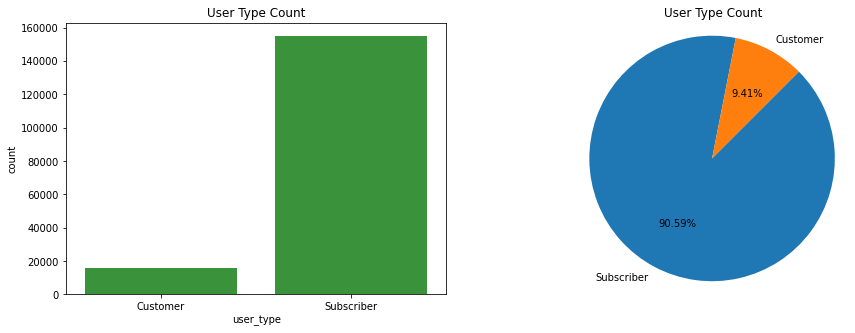

In [7]:
# plot a bar chart showing counts of user types
plt.figure (figsize = [15, 5])
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[2]
sb.countplot(data=df_2, x='user_type', color=base_color)
plt.title('User Type Count');
# plot a pie chart showing percentage counts of user types
plt.subplot(1, 2, 2)
user_counts = df_2['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, startangle = 45,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('User Type Count');

## Bike Rides on the Week_started

Rides were mostly made on weekdays than weekends with the most rides made on thursdays.

Text(0.5, 1.0, 'Week Started Frequency')

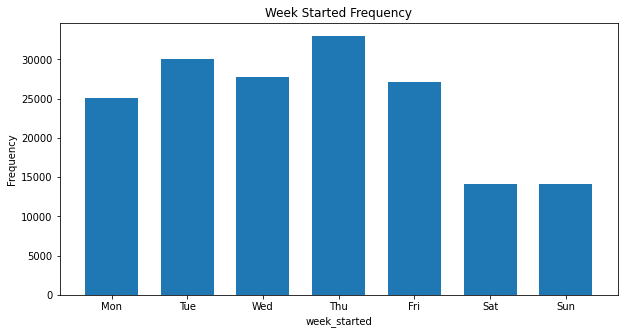

In [3]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df_2, x = 'week_started', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), weekday)
plt.xlabel('week_started');
plt.ylabel('Frequency')
plt.title('Week Started Frequency')

## member_gender vs week_started

Both male and female riders used bikes mostly on thursdays and tuesdays and least on weekends



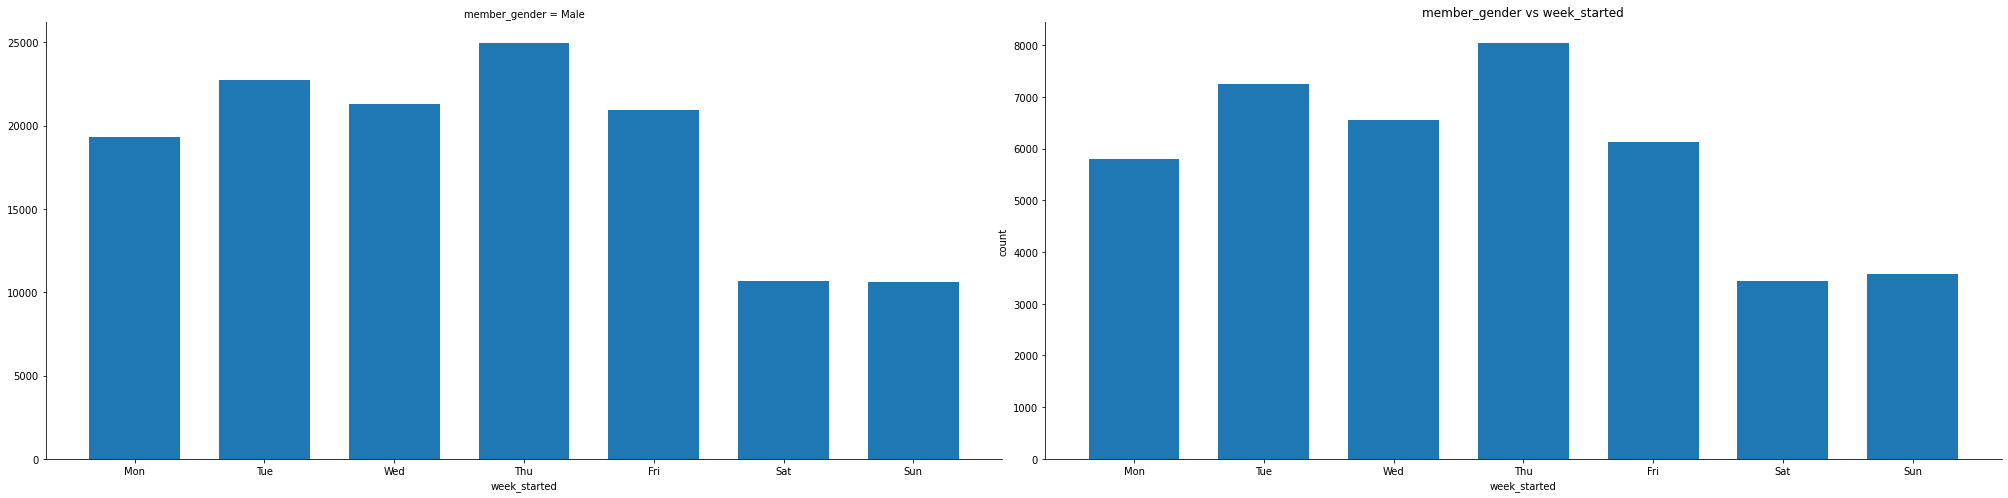

In [4]:
# Histogram to compare member_gender and week_started
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = df_2, col = 'member_gender', height=7, aspect=2,  sharey=False)
g.map(plt.hist, 'week_started', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), weekday)
plt.ylabel('count')
plt.title('member_gender vs week_started');

## User_type vs hour_ended
Both plots are bimodal and they showed that most rides for both the customers and the subscribers started and ended within the same time being 8:00 to 17:00 which falls within the first and fourth quartile.


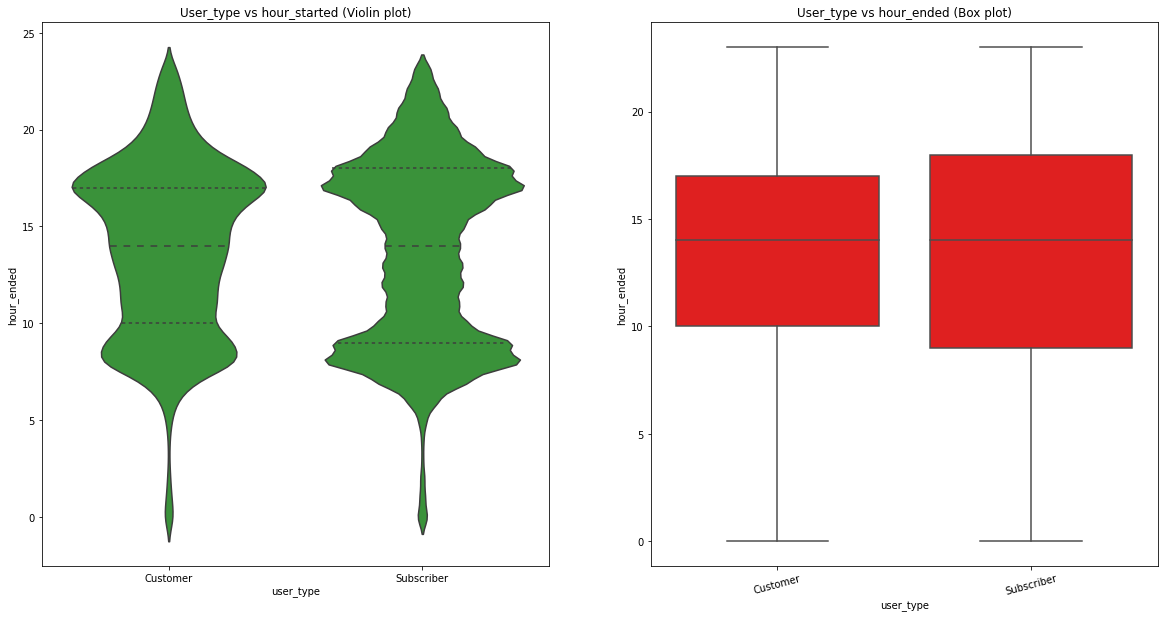

In [8]:
# Violin Plot
plt.figure (figsize = [20, 10])
plt.subplot(1, 2, 1)
sb.violinplot(data=df_2, x='user_type', y='hour_ended', color=base_color, inner='quartile')
plt.title('User_type vs hour_started (Violin plot)');
# box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_2, x='user_type', y='hour_ended', color='red')
plt.xticks(rotation=15)
plt.title('User_type vs hour_ended (Box plot)');

## Week_ended vs Average Duration

On average most bike rides lasted longer on weekends.

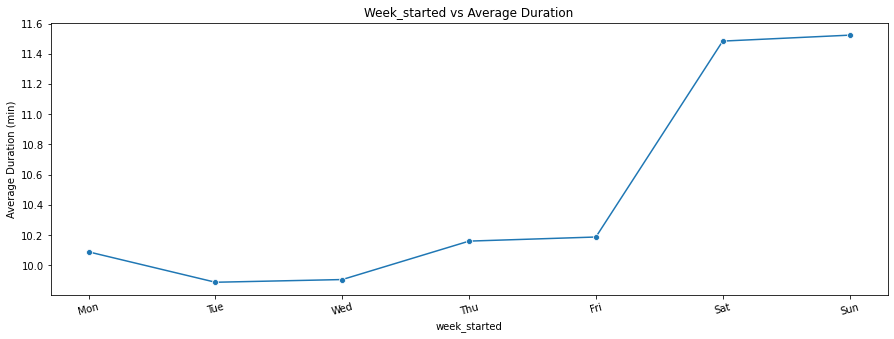

In [6]:
# give duration_by_minutes a benchmark of 60
dur_min = df_2[df_2.duration_by_minutes <= 60]
# Line chart
avg_mins = dur_min.groupby('week_started').duration_by_minutes.mean()
plt.figure(figsize=[15,5])
sb.lineplot(x=avg_mins.index, y=avg_mins, marker='o')
plt.xticks(np.arange(0, 7), weekday, rotation=15)
plt.ylabel('Average Duration (min)')
plt.title('Week_started vs Average Duration');

## Duration_by_minutes vs Week_started for every user_type

Customers had the highest average bike ride duration than subscribers

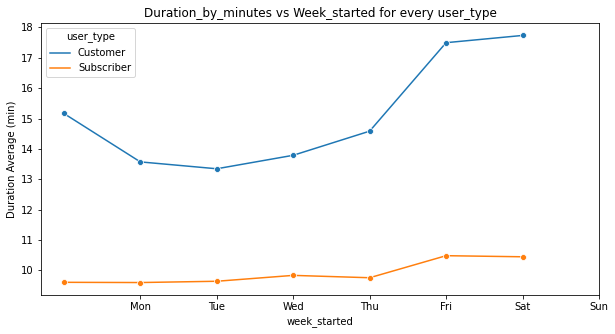

In [10]:
avg = dur_min.groupby(['user_type','week_started']).duration_by_minutes.mean()
avg = avg.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = avg, x='week_started', y='duration_by_minutes', hue='user_type', marker='o')
plt.xticks(np.arange(1,8), weekday)
plt.ylabel('Duration Average (min)')
plt.title('Duration_by_minutes vs Week_started for every user_type');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Main.ipynb --to slides --post serve --no-input --no-prompt